# MainQUEST09

- 24. 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니? [프로젝트]
- 2024.8.14
- 15:49~
- 구태훈

* 24-1. 프로젝트: 새로운 데이터셋으로 나만의 이미지 분류기 만들어보기

# Step 1. 데이터셋 내려받기

* 이번에는 tensorflow_datasets 에 포함된 tf_flowers 데이터를 사용해 보겠습니다. tf_flowers 데이터에 대한 정보는 다음에서 확인해볼 수 있습니다.
* tfds.load를 활용하여 데이터셋을 다운받으세요.

In [19]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Step 1: 데이터셋 내려받기
(train_ds, validation_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:90%]', 'train[90%:]'],
    data_dir='/content/drive/MyDrive/Colab Notebooks/DS2/DL/LMS/MainQUEST09/submission/',
    download=False,
    with_info=True,
    as_supervised=True,
)

num_classes = metadata.features['label'].num_classes

# Step 2. 데이터셋을 모델에 넣을 수 있는 형태로 준비하기

* 이미지를 모두 같은 크기로 formatting 한 후, train_batches, validation_batches, test_batches를 준비합니다.


In [20]:

# Step 2: 데이터셋 준비
IMG_SIZE = 224

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).map(format_example).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_batches = validation_ds.map(format_example).batch(BATCH_SIZE)
test_batches = test_ds.map(format_example).batch(BATCH_SIZE)

Step 3. 모델 설계하기

cats_vs_dogs 의 경우와 달리, tf_flowers 데이터셋에서는 class의 갯수가 5가지입니다. 모델 설계시 어느 부분이 달라질지에 유의해 주세요.

In [21]:
# Step 3: 모델 설계
base_model = VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                   include_top=False,
                   weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 4. 모델 학습시키기

* 모델을 학습시켜봅니다. 단, 여기에서는 여러 가지 옵션을 바꿔볼 수 있습니다.
* 예를 들어, 모델 학습을 10 epoch보다 더 많이 시켜보거나, learning_rate 값을 바꿔볼 수 있습니다.
* 또는, optimizer의 종류도 바꿔볼 수 있습니다. 바꿔보고 싶다면, 여기를 참고하세요.
* 어쩌면 VGG16이 아닌 다른 모델을 base model로 활용할 수도 있을 것입니다. 그리고 파인튜닝을 fc layer의 구성에 변화를 줄 수 있을지도 모릅니다.
* 이전 스텝에서는 시도하지 않았던 Regularization 기법이 적용된다면 어떨까요? Dropout이나 Batch Normalization을 적용하는 것은 그리 어려운 일이 아닙니다.


In [22]:
# Step 4: 모델 학습
history = model.fit(train_batches,
                    epochs=20,
                    validation_data=validation_batches)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.3174 - loss: 1.7483 - val_accuracy: 0.6567 - val_loss: 1.2562
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5616 - loss: 1.1199 - val_accuracy: 0.7234 - val_loss: 1.0322
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6645 - loss: 0.9101 - val_accuracy: 0.7575 - val_loss: 0.8501
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7118 - loss: 0.7861 - val_accuracy: 0.7875 - val_loss: 0.7094
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7610 - loss: 0.6924 - val_accuracy: 0.8052 - val_loss: 0.6164
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7601 - loss: 0.6488 - val_accuracy: 0.8093 - val_loss: 0.5539
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7870 - loss: 0.6202 - val_accuracy: 0.8174 - val_loss: 0.5170
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7804 - loss: 0.5958 - val_accuracy: 0.8188 - v

# Step 5. 모델 성능 평가하기
* 모델 학습이 완료되었다면, 모델의 성능을 평가할 차례입니다.
* 모델이 학습된 과정을 그래프로도 그려보고, validation_batches나 test_batches에 있는 데이터에 대한 예측 결과도 확인해 보세요!

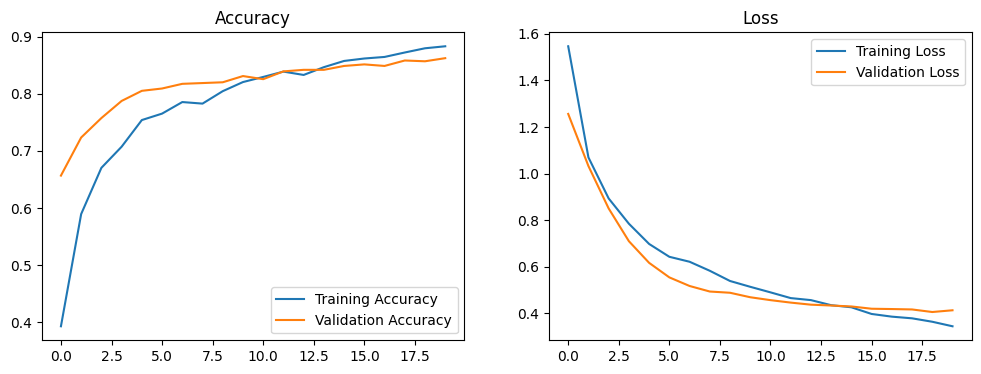

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8561 - loss: 0.3755
Test accuracy: 0.86


In [23]:
# Step 5: 모델 성능 평가
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

test_loss, test_accuracy = model.evaluate(test_batches)
print(f"Test accuracy: {test_accuracy:.2f}")

# Step 6. 모델 활용하기
* 모델이 꽤나 똑똑해졌다면, 이제 활용해볼 수 있습니다.
* 원하는 이미지를 자유롭게 모델에 입력해 보고, 어떤 예측 결과를 내는지 확인해 보세요!

In [40]:

# Step 6: 모델 활용

def show_and_predict_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = (img_array / 127.5) - 1

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    class_names = metadata.features['label'].names
    predicted_class = class_names[tf.argmax(score)]
    confidence = 100 * tf.reduce_max(score)

    print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")

# 예시: 'path_to_your_image.jpg'를 실제 이미지 경로로 바꿔주세요


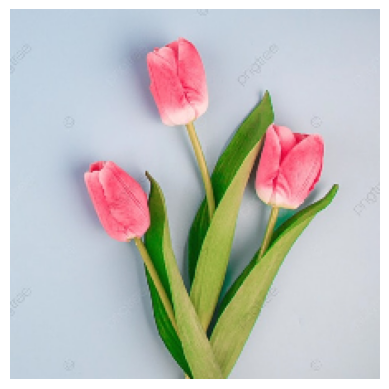

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This image most likely belongs to tulips with a 29.45 percent confidence.


In [51]:
img_directory = '/content/drive/MyDrive/Colab Notebooks/DS2/DL/LMS/MainQUEST09/test_img/'
file_name = 'tulip.jpg'

show_and_predict_image(img_directory + file_name)

# 회고
* 사소한 경로문제로 초반에 시간 소모를 했습니다. 평소대로 코랩에서 작업을 하려고 데이터를 불러오는데 어려움이 있었습니다. 주피터 노트북의 경로 cats_vs_dogs 이하에 4.0.0이 더 있었고 8개의 파일을 복사해서 경로를 일치시켜도 코랩에서 로딩할 때 에러가 계속 났습니다. 다운로드 옵션이 있어서 혹시나해서 cats_vs_dogs 이하를 지우고 download=True로 설정하니 설정된 경로로 다시 다운로드 받아서 로딩이 되었습니다.
* 코랩에서 ChatGPT의 도움을 받아서 작성하다가 GlobalAveragePooling2D로 변경해서 model.summary()에서 shape이 맞지 않다는 오류가 계속 나와서 해결이 어려웠습니다. LMS와 같이 작성을 해도 문제가 있어서 버전문제인가 해서 도움을 받으려해도 해결이 안되었습니다. 한참 후에 Claude로 변경해서 도움을 편하게 받고 있습니다.
* 꽃에서는 인식률이 상대적으로 떨어졌습니다. 이진 분류보다 5 분류로 인식하는 것이 어렵다고 생각되어집니다. 다른 모델로 구성하면 인식률이 많이 좋아질 지 궁금한 상태로 프로젝트를 종료했습니다.
